In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [225]:
dataframe_names = [
    'user_friends',
    'user_taggedartists',
    'artists',
    'tags',
    'user_artists']

file_names = [
    'data/user_friends.dat',
    'data/user_taggedartists.dat',
    'data/artists.dat',
    'data/tags.dat',
    'data/user_artists.dat']

In [226]:
for (dataframe, file) in zip(dataframe_names, file_names):
    if dataframe == 'tags':
        vars()[dataframe] = pd.read_table(file, sep="\t", encoding = "latin-1")
    else:
        vars()[dataframe] = pd.read_table(file, sep="\t")

## Exploring the data

In [4]:
user_artists.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [5]:
list_of_weights = np.asarray(user_artists['weight'])

(array([8.1435e+04, 6.8300e+03, 1.9950e+03, 8.8700e+02, 4.6700e+02,
        2.6300e+02, 1.7500e+02, 1.0900e+02, 9.2000e+01, 8.4000e+01,
        6.0000e+01, 4.6000e+01, 3.5000e+01, 4.2000e+01, 3.0000e+01,
        1.6000e+01, 1.7000e+01, 2.0000e+01, 1.7000e+01, 1.4000e+01,
        1.8000e+01, 7.0000e+00, 1.4000e+01, 9.0000e+00, 9.0000e+00,
        9.0000e+00, 9.0000e+00, 7.0000e+00, 7.0000e+00, 7.0000e+00,
        5.0000e+00, 4.0000e+00, 3.0000e+00, 5.0000e+00, 5.0000e+00,
        2.0000e+00, 1.0000e+00, 6.0000e+00, 4.0000e+00, 0.0000e+00,
        5.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

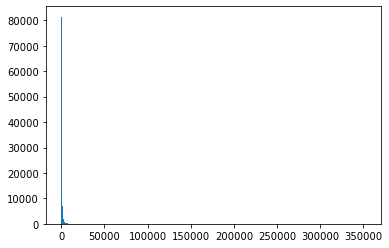

In [6]:
plt.hist(list_of_weights, bins=300)

(array([17759., 14407., 11094.,  8422.,  6262.,  4968.,  3828.,  3172.,
         2543.,  2116.,  1794.,  1360.,  1223.,  1258.,  1077.,   899.,
          749.,   714.,   624.,   575.,   536.,   416.,   409.,   356.,
          292.,   324.,   255.,   266.,   257.,   238.]),
 array([1.00000000e+00, 7.85666667e+01, 1.56133333e+02, 2.33700000e+02,
        3.11266667e+02, 3.88833333e+02, 4.66400000e+02, 5.43966667e+02,
        6.21533333e+02, 6.99100000e+02, 7.76666667e+02, 8.54233333e+02,
        9.31800000e+02, 1.00936667e+03, 1.08693333e+03, 1.16450000e+03,
        1.24206667e+03, 1.31963333e+03, 1.39720000e+03, 1.47476667e+03,
        1.55233333e+03, 1.62990000e+03, 1.70746667e+03, 1.78503333e+03,
        1.86260000e+03, 1.94016667e+03, 2.01773333e+03, 2.09530000e+03,
        2.17286667e+03, 2.25043333e+03, 2.32800000e+03]),
 <BarContainer object of 30 artists>)

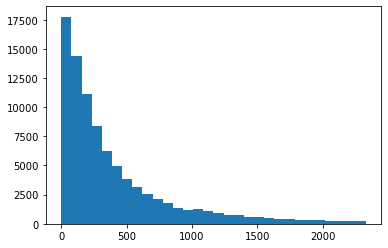

In [7]:
plt.hist(user_artists[user_artists['weight']<=2328]['weight'], bins = 30)

In [8]:
user_artists[user_artists['weight']<=10].count()/92834

userID      0.037282
artistID    0.037282
weight      0.037282
dtype: float64

## Different options

### Option 1
Since the distribution of weights has a very long tail, we can find a point where most of the tail is where users gave artists a 5-star rating, and then divide the rest of the weights intuitively/mathematically into 1-4 stars.

### Option 2
Use a users average weighting and do a normal distribution seperator. 
1. Do a case study on 10 random people to see the distribution of their weights 
2. Find an algorithm to decipher how close each users distribution of weights is to a normal distribution - if it's close then we can use normal distribution to assign their weights.

## Investigating users average weight

In [10]:
distribution_of_weights_given = (
    user_artists
    .groupby('weight', as_index=False)
    .agg({'userID': ['mean']})
)

In [11]:
distribution_of_weights_given.columns

MultiIndex([('weight',     ''),
            ('userID', 'mean')],
           )

In [12]:
distribution_of_weights_given.columns = ['weight', 'users_avg']

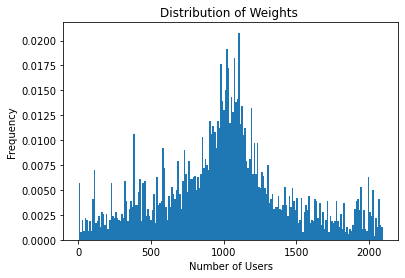

In [13]:
data = distribution_of_weights_given['users_avg']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=200)
plt.gca().set(
    title='Distribution of Average Weights ', 
    xlabel='Average Weight per User',
    ylabel='Frequency'
);

In [14]:
user_artists[user_artists['userID']==2]

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
5,2,56,6152
6,2,57,5955
7,2,58,4616
8,2,59,4337
9,2,60,4147


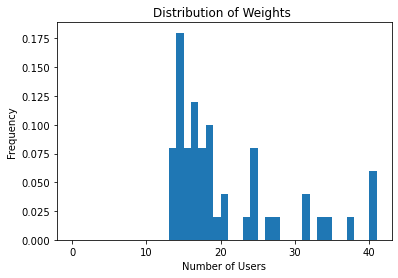

In [31]:
data = user_artists[user_artists['userID']==6]['weight']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=range(0,42))
plt.gca().set(
    title='Distribution of Weights ', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

In [27]:
user_artists[user_artists['userID']==6]['weight'].max()

41

In [29]:
user_artists[user_artists['userID']==6]['weight'].min()

13

In [32]:
user6 = user_artists[user_artists['userID']==6]

In [34]:
user6[user6['weight']<20].count()/len(user6)

userID      0.66
artistID    0.66
weight      0.66
dtype: float64

In [35]:
user_artists[user_artists['weight']<10].count()/len(user_artists)

userID      0.034524
artistID    0.034524
weight      0.034524
dtype: float64

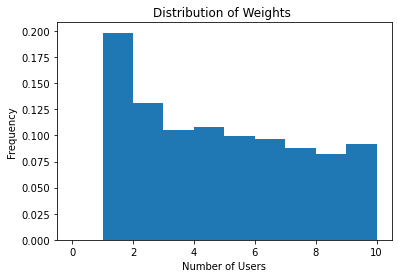

In [37]:
data = user_artists[user_artists['weight']<10]['weight']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=range(0,11))
plt.gca().set(
    title='Distribution of Weights ', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

## User-based option

There are different methods we can try to use to identify the star rating for each user-artist match.

#### Option 1:
Assume equal distribution of ratings, and assign the bottom 20% 1-star, the next 20% 2-star, the next 20% 3-star, etc.

The drawbacks of this option:
- It is not user specific, the percentages (20%) will be the same for all users.
- It is not accurately representative of the weights.

#### Option 2:
Assume that the opinions of users follow a normal distribution, where 1 and 5 star ratings occur less frequently, and 3 star ratings occur most frequently. 

The drawbacks of this option:
- Since the distribution (upon brief analysis) of each user's weights follow more of a gamma/exponetial distribution, the normal distribution wil have to be created as a standard guideline and will not be user-specific.

In [39]:
user6['weight'].mean()

20.22

In [57]:
sd = np.std(user6['weight'])

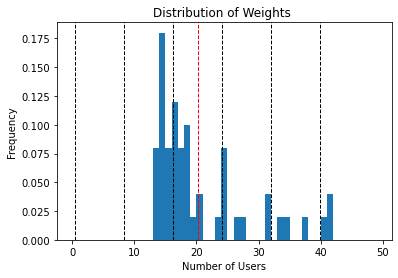

In [58]:
data = user6['weight']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=range(0,50))
plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (2.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (1.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (0.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (0.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (1.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (2.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.gca().set(
    title='Distribution of Weights ', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

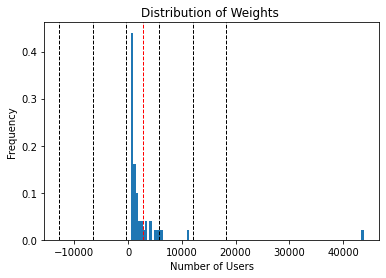

In [59]:
user7 = user_artists[user_artists['userID']==7]
mean = user7['weight'].mean()
sd = np.std(user7['weight'])

data = user7['weight']
plt.hist(data, weights=np.ones(len(data)) / len(data), bins=100)
plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (2.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (1.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (0.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (0.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (1.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (2.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.gca().set(
    title='Distribution of Weights ', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

## Removing outliers for user 7 to adjust standard deviation

In [78]:
mean = user7['weight'].mean()
sd = np.std(user7['weight'])

In [77]:
user7_final

,userID,artistID,weight
250,7,55,3151
251,7,67,2540
252,7,89,5846
253,7,257,5188
255,7,289,11112
256,7,290,6266
257,7,291,5379
258,7,292,4201
259,7,293,4059
260,7,294,3251


In [79]:
user7_almostfinal = user7[abs(user7['weight']-mean)<(2*sd)]
mean = user7_almostfinal['weight'].mean()
sd = np.std(user7_almostfinal['weight'])

In [81]:
user7_final = user7_almostfinal[abs(user7_almostfinal['weight']-mean)<(2*sd)]
mean = user7_final['weight'].mean()
sd = np.std(user7_final['weight'])

(array([[47.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  2.,  0.,  0.,  9., 35.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

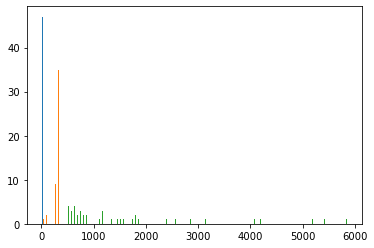

In [82]:
plt.hist(user7_final, bins=100)

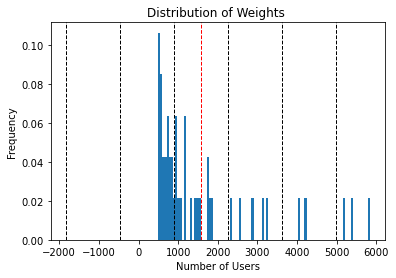

In [83]:
data = user7_final['weight']
mean = data.mean()
sd = np.std(data)

plt.hist(data, weights=np.ones(len(data)) / len(data), bins=100)
plt.axvline(data.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (2.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (1.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() - (0.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (0.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (1.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.mean() + (2.5 * sd), color='k', linestyle='dashed', linewidth=1)
plt.gca().set(
    title='Distribution of Weights ', 
    xlabel='Number of Users',
    ylabel='Frequency'
);

# Creating a loop to add star-ratings (without excluding outliers)

In [118]:
## Creating a dictionary to discover each users mean and standard deviation
means = {}
stds = {}
for userID in user_artists.userID.unique():
    user_data = user_artists[user_artists['userID']==userID]
    user_mean = user_data['weight'].mean()
    user_std = np.std(user_data['weight'])
    means[userID] = user_mean
    stds[userID] = user_std

In [123]:
user_artists['rating'] = 0
user_artists['mean'] = 0
user_artists['std'] = 0

In [124]:
def find_mean(row):
    return means[row['userID']]

def find_std(row):
    return stds[row['userID']]

In [125]:
user_artists['mean'] = user_artists.apply(lambda row: find_mean(row), axis=1)

In [127]:
user_artists['std'] = user_artists.apply(lambda row: find_std(row), axis=1)

In [128]:
user_artists

,userID,artistID,weight,rating,mean,std
0,2,51,13883,3,3374.74,2908.622154
1,2,52,11690,3,3374.74,2908.622154
2,2,53,11351,3,3374.74,2908.622154
3,2,54,10300,3,3374.74,2908.622154
4,2,55,8983,3,3374.74,2908.622154
...,...,...,...,...,...,...
92829,2100,18726,337,3,617.54,366.972163
92830,2100,18727,297,3,617.54,366.972163
92831,2100,18728,281,3,617.54,366.972163
92832,2100,18729,280,3,617.54,366.972163


In [132]:
def find_rating(row):
    weight = row['weight']
    user_mean = row['mean']
    user_std = row['std']
    if weight <= (user_mean - (1.5 * user_std)):
        return 1
    elif weight <= (user_mean - (0.5 * user_std)):
        return 2
    elif weight <= (user_mean + (0.5 * user_std)):
        return 3
    elif weight <= (user_mean + (1.5 * user_std)):
        return 4
    elif weight > (user_mean + (1.5 * user_std)):
        return 5

In [133]:
user_artists['rating'] = user_artists.apply(lambda row: find_rating(row), axis=1)

In [136]:
user_artists['rating'].mean()

2.9787146950470733

(array([0.0000e+00, 3.3000e+01, 2.1449e+04, 5.7678e+04, 1.3674e+04]),
 array([0, 1, 2, 3, 4, 5]),
 <BarContainer object of 5 artists>)

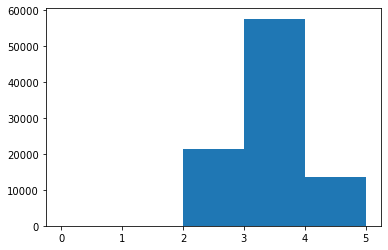

In [141]:
plt.hist(user_artists['rating'], bins=range(0,6))

There are no artists that recieved a 1-star rating, this is due to the fact that the users' weights are not normally distributed, they're long-tailed distributions. 

This causes the standard deviation to be larger, meaning that most of the weights to the left of the mean will be within 1 standard deviation of the mean, resulting in no 1-star ratings.

A possible solution to this would be to exclude outliers when finding the mean and standard deviation of each user. If this does not have the desired effect, we can set standardised cut off points, for example, a weight less than 10 will be 1-star for everyone, or a weight larger than 30,000 will be 5-stars for everyone.

## Adjusting star-ratings to allow for outlier exclusion

In [175]:
## Removing any weight that is above 2 standard deviations away from the mean
adjusted_user_artists = user_artists[abs(user_artists['weight']-user_artists['mean'])<(2*user_artists['std'])]

In [176]:
## Dropping and recreating the mean, standard deviation and rating columns
adjusted_user_artists = adjusted_user_artists.drop(['std', 'rating', 'mean'], axis=1)

adjusted_user_artists['rating'] = 0
adjusted_user_artists['mean'] = 0
adjusted_user_artists['std'] = 0

In [181]:
## Finding the new means and standard deviations
## Creating a dictionary to discover each users mean and standard deviation
means = {}
stds = {}
for userID in adjusted_user_artists.userID.unique():
    user_data = user_artists[user_artists['userID']==userID]
    user_mean = user_data['weight'].mean()
    user_std = np.std(user_data['weight'])
    means[userID] = user_mean
    stds[userID] = user_std

In [182]:
def find_mean(row, means):
    return means[row['userID']]

def find_std(row, stds):
    return stds[row['userID']]

In [183]:
## Recalculate the means, standard deviations and ratings

adjusted_user_artists['mean'] = adjusted_user_artists.apply(lambda row: find_mean(row, means), axis=1)
adjusted_user_artists['std'] = adjusted_user_artists.apply(lambda row: find_std(row, stds), axis=1)
adjusted_user_artists['rating'] = adjusted_user_artists.apply(lambda row: find_rating(row), axis=1)

In [184]:
adjusted_user_artists

,userID,artistID,weight,rating,mean,std
4,2,55,8983,5,3374.74,2908.622154
5,2,56,6152,4,3374.74,2908.622154
6,2,57,5955,4,3374.74,2908.622154
7,2,58,4616,3,3374.74,2908.622154
8,2,59,4337,3,3374.74,2908.622154
...,...,...,...,...,...,...
92829,2100,18726,337,2,617.54,366.972163
92830,2100,18727,297,2,617.54,366.972163
92831,2100,18728,281,2,617.54,366.972163
92832,2100,18729,280,2,617.54,366.972163


(array([2.0000e+00, 0.0000e+00, 2.1449e+04, 0.0000e+00, 0.0000e+00,
        5.7678e+04, 0.0000e+00, 7.8090e+03, 0.0000e+00, 1.7090e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

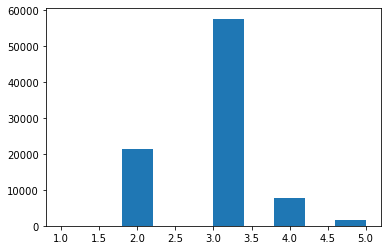

In [191]:
plt.hist(adjusted_user_artists['rating'], bins=10)

So the adjustment didn't have a huge effect on the final allocation of ratings, there are still a large number of weights on the tail of the distribution that are skewing the ratings.

A next possible option would be to filter the data where weights are below 2328, as we found that this exludes the top 5% of values that could be skewing the data.

Or to use the median instead of the mean (probs not helpful)

Or to use only half a standard deviation to the left of the mean

## Adding star ratings excluding the top 5% of weights

In [201]:
adjusted_user_artists = user_artists[user_artists['weight']<=2328]

In [203]:
## Dropping and recreating the mean, standard deviation and rating columns
adjusted_user_artists = adjusted_user_artists.drop(['std', 'rating', 'mean'], axis=1)

adjusted_user_artists['rating'] = 0
adjusted_user_artists['mean'] = 0
adjusted_user_artists['std'] = 0

In [204]:
## Finding the new means and standard deviations
## Creating a dictionary to discover each users mean and standard deviation
means = {}
stds = {}
for userID in adjusted_user_artists.userID.unique():
    user_data = user_artists[user_artists['userID']==userID]
    user_mean = user_data['weight'].mean()
    user_std = np.std(user_data['weight'])
    means[userID] = user_mean
    stds[userID] = user_std

In [205]:
## Recalculate the means, standard deviations and ratings

adjusted_user_artists['mean'] = adjusted_user_artists.apply(lambda row: find_mean(row, means), axis=1)
adjusted_user_artists['std'] = adjusted_user_artists.apply(lambda row: find_std(row, stds), axis=1)
adjusted_user_artists['rating'] = adjusted_user_artists.apply(lambda row: find_rating(row), axis=1)

(array([3.1000e+01, 0.0000e+00, 2.1375e+04, 0.0000e+00, 0.0000e+00,
        5.6176e+04, 0.0000e+00, 6.8130e+03, 0.0000e+00, 3.7980e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

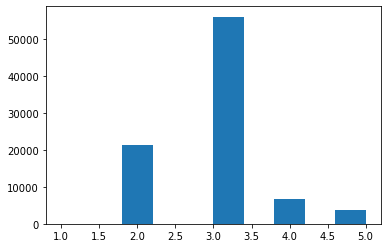

In [207]:
plt.hist(adjusted_user_artists['rating'])

Still have the same issue, let's investigate what proportion of users' weights are less than their mean.

## Investigating proportion of weights below mean

In [208]:
## Finding the new means and standard deviations
## Creating a dictionary to discover each users mean and standard deviation
means = {}
stds = {}
for userID in user_artists.userID.unique():
    user_data = user_artists[user_artists['userID']==userID]
    user_mean = user_data['weight'].mean()
    user_std = np.std(user_data['weight'])
    means[userID] = user_mean
    stds[userID] = user_std

In [216]:
below_mean = {}
weights = []
for userID in adjusted_user_artists.userID.unique():
    total = 0
    below_means_count = 0
    user_data = user_artists[user_artists['userID']==userID]
    for weight in user_data['weight']:
        if weight <= means[userID]:
            below_means_count += 1
            weights.append(weight)
        total += 1
    below_mean[userID] = below_means_count/total

(array([  1.,   0.,   7.,  73., 329., 557., 572., 224.,  78.,  48.]),
 array([0.34 , 0.406, 0.472, 0.538, 0.604, 0.67 , 0.736, 0.802, 0.868,
        0.934, 1.   ]),
 <BarContainer object of 10 artists>)

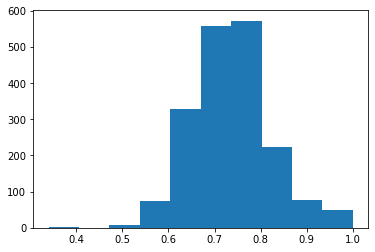

In [215]:
plt.hist(below_mean.values())

Judging by this graph, almost all of the users have most of their weightings lower than their mean, meaning that there are few very large weights that are causing this increase in the mean.

(array([5.285e+04, 9.924e+03, 2.919e+03, 1.126e+03, 5.510e+02, 3.350e+02,
        1.880e+02, 9.900e+01, 6.900e+01, 4.400e+01, 3.400e+01, 1.100e+01,
        6.000e+00, 7.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00]),
 array([1.0000e+00, 4.3940e+02, 8.7780e+02, 1.3162e+03, 1.7546e+03,
        2.1930e+03, 2.6314e+03, 3.0698e+03, 3.5082e+03, 3.9466e+03,
        4.3850e+03, 4.8234e+03, 5.2618e+03, 5.7002e+03, 6.1386e+03,
        6.5770e+03, 7.0154e+03, 7.4538e+03, 7.8922e+03, 8.3306e+03,
        8.7690e+03]),
 <BarContainer object of 20 artists>)

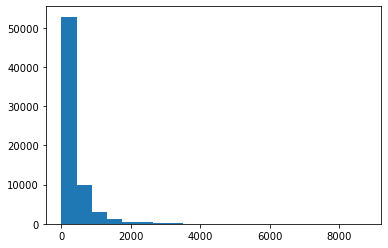

In [219]:
plt.hist(weights, bins = 20)

In [223]:
len([weight for weight in weights if weight<=2000])/len(weights)

0.9852880779159822

1. Find the mean
2. Find the minimum, and find the range of weights between the minimum and the mean.
3. Adjust the ratings so this range is divided into 25%, 50%, 25% for 1-star, 2-star and 3-star ratings respectively.
4. Find the maximum (up to a limit), and find the range of weights between the mean and the maximum.
5. Adjust the ratings so this range is divided into 25%, 50%, 25% for 3-star, 4-star and 5-star ratings respectively.

The weights will not be distributed evenly, the percentages will be calculated as minimum + ((mean - min) * 0.25) for thw 1 star ratings, for example.

In [229]:
user_artists['mean'] = 0
user_artists['rating'] = 0